In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\USER\Downloads\zomato.csv", encoding='ISO-8859-1')

In [3]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [4]:
df.shape

(9551, 21)

In [5]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
df['City'].nunique()

141

In [9]:
df['Cuisines'].nunique()

1825

# Number of Restaurants City wise.

In [10]:
res_count = df['City'].value_counts()

In [11]:
res_count = pd.DataFrame(res_count)
res_count = res_count.reset_index()

In [12]:
res_count.columns = ['City','Count']

In [13]:
res_count.head()

,City,Count
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25


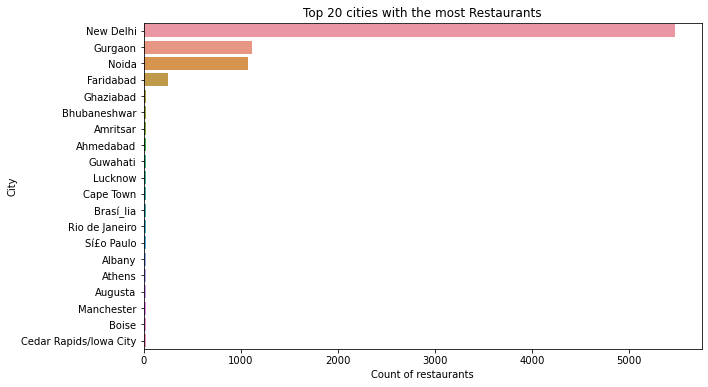

In [14]:
sorted_res_count = res_count.sort_values(by='Count',ascending=False)
top_N=20
plt.figure(figsize=(10,6))
sns.barplot(x='Count',y='City', data=sorted_res_count.head(top_N))
plt.xlabel('Count of restaurants')
plt.ylabel('City')
plt.title(f'Top {top_N} cities with the most Restaurants')
plt.show()

In [15]:
pivot_data = sorted_res_count.head(40).pivot_table(index='City',values='Count', aggfunc='sum')

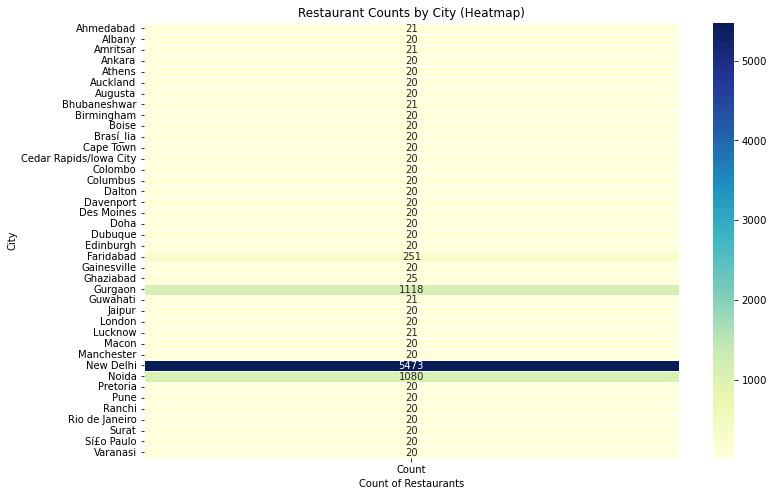

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(pivot_data,annot=True, cmap='YlGnBu',fmt='d', linewidths=0.5)
plt.xlabel('Count of Restaurants')
plt.ylabel('City')
plt.title('Restaurant Counts by City (Heatmap)')
plt.show()

Number Restaurants in Delhi, Noida and Gurgaon are in 4 digits, Faridabad are in  3 digits and other cities are in 2 or 1 digit.
We will focus on the Delhi NCR reagion (leaving Ghaziabad) and work on it.

## THE NCR DATA

In [17]:
ncr = df[df['City'].isin(['New Delhi','Gurgaon','Noida','Faridabad'])]

In [18]:
ncr.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
865,301728,Desire Foods,1,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,"Chinese, Fast Food, Bakery",...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4
866,5992,Knight Rock,1,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,2.8,Orange,Average,16
867,301730,Punjab Restaurant,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305563,28.490137,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,8


In [19]:
ncr['Cuisines'].nunique()

1156

In [20]:
top_cuisines = ncr['Cuisines'].value_counts().sort_values(ascending = False)

In [21]:
top_cuisines.head()

North Indian             901
North Indian, Chinese    474
Fast Food                330
Chinese                  323
North Indian, Mughlai    313
Name: Cuisines, dtype: int64

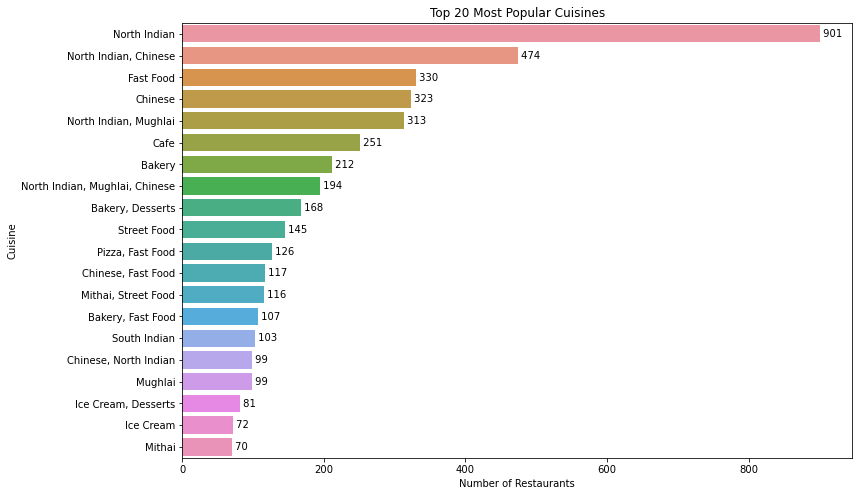

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(x=top_cuisines.head(20), y=top_cuisines.head(20).index)
for index, value in enumerate(top_cuisines.head(20)):
    plt.text(value, index, f' {value}', va='center')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.title('Top 20 Most Popular Cuisines')
plt.show()

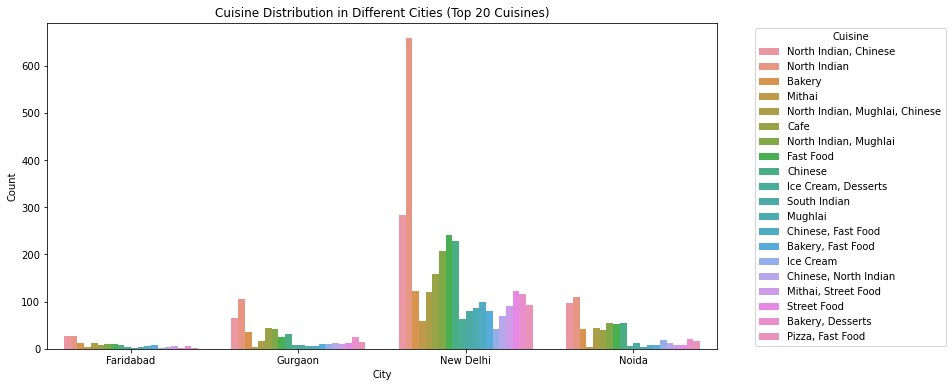

In [23]:
filtered_df = ncr[ncr['Cuisines'].isin(top_cuisines.head(20).index)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='City', hue='Cuisines')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Cuisine Distribution in Different Cities (Top 20 Cuisines)')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

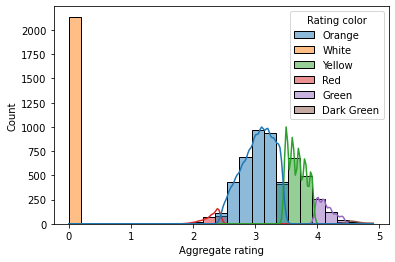

In [24]:
sns.histplot(data=ncr, x='Aggregate rating', hue = 'Rating color', kde = True, alpha = 0.5, bins = 25)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


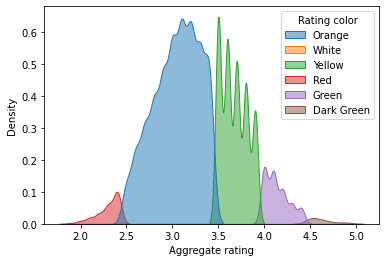

In [70]:
sns.kdeplot(data=ncr, x='Aggregate rating', hue = 'Rating color', fill = True, alpha = 0.5)
plt.show()

From the above two visualization, we can conclude that for specific ranges of 'Aggregate rating' there are corresponding colors

### Getting (mapping) the range of 'Aggregate rating' and the corresponding 'Rating color'

In [26]:
rating_ranges = ncr.groupby('Rating color')['Aggregate rating'].agg(['min', 'max']).reset_index()
print(rating_ranges)

  Rating color  min  max
0   Dark Green  4.5  4.9
1        Green  4.0  4.4
2       Orange  2.5  3.4
3          Red  1.9  2.4
4        White  0.0  0.0
5       Yellow  3.5  3.9


### Mapping the 'Rating color' and 'Rating text'

In [27]:
rating_mapping = ncr.groupby(['Rating color', 'Rating text']).size().reset_index(name='Count')
print(rating_mapping)

  Rating color Rating text  Count
0   Dark Green   Excellent     43
1        Green   Very Good    413
2       Orange     Average   3571
3          Red        Poor    178
4        White   Not rated   2137
5       Yellow        Good   1580


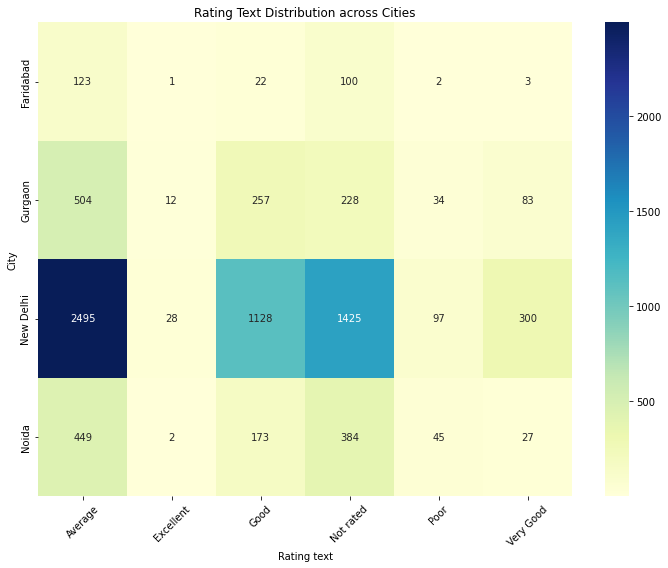

In [28]:
pivot_table = ncr.pivot_table(index='City', columns='Rating text', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table,cmap='YlGnBu', annot=True, fmt='d')
plt.title('Rating Text Distribution across Cities')
plt.xlabel('Rating text')
plt.ylabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Creating a table corresponding to the above heatmap

In [29]:
pd.crosstab(ncr['Rating text'], ncr['City'])

City,Faridabad,Gurgaon,New Delhi,Noida
Rating text,,,,
Average,123,504,2495,449
Excellent,1,12,28,2
Good,22,257,1128,173
Not rated,100,228,1425,384
Poor,2,34,97,45
Very Good,3,83,300,27


#### Converting the categorical columns to numerical columns

In [30]:
cols = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder = LabelEncoder()
for col in cols:
    ncr[col] = label_encoder.fit_transform(ncr[col]) #converting the categorical columns mentioned in cols to numerical column

C:\Users\USER\AppData\Local\Temp/ipykernel_7648/13617386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncr[col] = label_encoder.fit_transform(ncr[col]) #converting the categorical columns mentioned in cols to numerical column


In [33]:
ncr.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
865,301728,Desire Foods,1,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,"Chinese, Fast Food, Bakery",...,Indian Rupees(Rs.),0,0,0,0,1,2.9,Orange,Average,4
866,5992,Knight Rock,1,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,"North Indian, Chinese",...,Indian Rupees(Rs.),0,0,0,0,2,2.8,Orange,Average,16
867,301730,Punjab Restaurant,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305563,28.490137,North Indian,...,Indian Rupees(Rs.),0,0,0,0,1,2.8,Orange,Average,8


In [34]:
rating_count = ncr['Aggregate rating'].value_counts().reset_index()
rating_count.columns = ['Aggregate rating','Count']

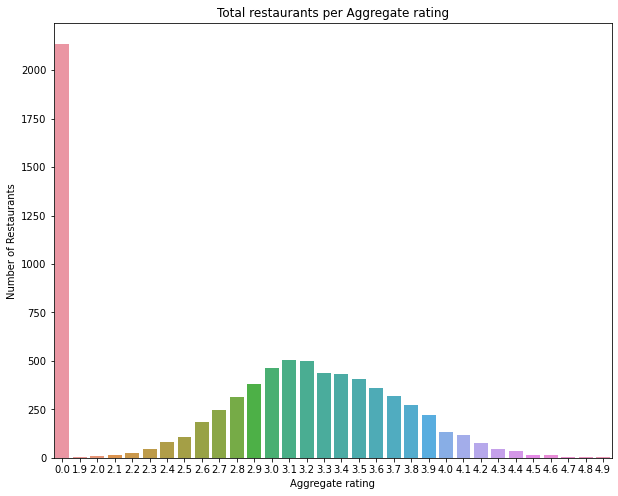

In [35]:
plt.figure(figsize=(10,8))
sns.barplot(x='Aggregate rating', y='Count', data=rating_count)
plt.xlabel('Aggregate rating')
plt.ylabel('Number of Restaurants')
plt.title('Total restaurants per Aggregate rating')
plt.show()

In [36]:
online_delivery = ncr[ncr['Has Online delivery']==1] # New dataframe of NCR restaurants with online delivry

In [37]:
rating_count_for_online_delivery = online_delivery['Aggregate rating'].value_counts().reset_index()
rating_count_for_online_delivery.columns = ['Aggregate rating','Count']

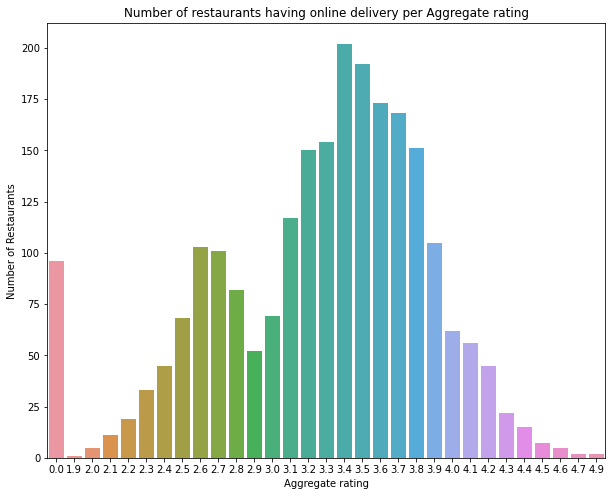

In [38]:
plt.figure(figsize=(10,8))
sns.barplot(x='Aggregate rating', y='Count', data=rating_count_for_online_delivery)
plt.xlabel('Aggregate rating')
plt.ylabel('Number of Restaurants')
plt.title('Number of restaurants having online delivery per Aggregate rating')
plt.show()

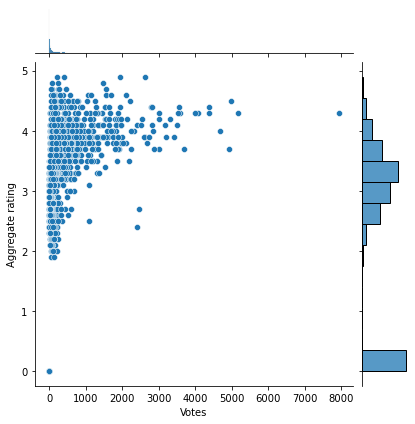

In [39]:
sns.jointplot(data=ncr, x='Votes', y='Aggregate rating', kind='scatter', height=6, ratio=6)
plt.show()

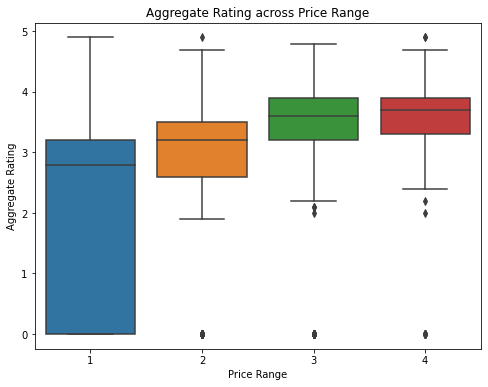

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=ncr, x='Price range', y='Aggregate rating')
plt.title('Aggregate Rating across Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

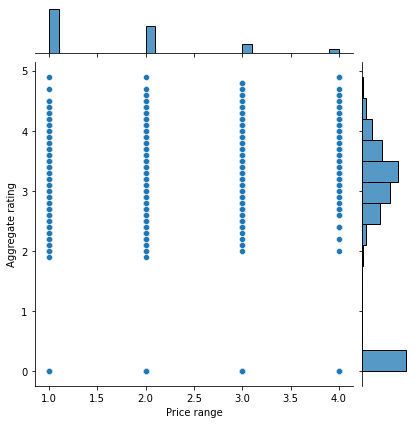

In [41]:
sns.jointplot(data=ncr, x='Price range', y='Aggregate rating', kind='scatter', height=6, ratio=6)
plt.show()

In [42]:
req_ncr_df = ncr[['Restaurant ID','Country Code','City','Locality','Cuisines','Longitude','Latitude','Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']]

In [43]:
req_ncr_df.head(2)

,Restaurant ID,Country Code,City,Locality,Cuisines,Longitude,Latitude,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
865,301728,1,Faridabad,Badarpur Border,"Chinese, Fast Food, Bakery",77.306640,28.490059,0,0,0,0,1,2.9,Orange,Average,4
866,5992,1,Faridabad,Badarpur Border,"North Indian, Chinese",77.304776,28.490157,0,0,0,0,2,2.8,Orange,Average,16


#### Converting the categorical columns to numerical columns

In [44]:
categorical_cols = ['City','Locality','Cuisines', 'Rating color', 'Rating text']

In [45]:
label_encoder = LabelEncoder()
for col in categorical_cols:
    req_ncr_df[col] = label_encoder.fit_transform(req_ncr_df[col])

C:\Users\USER\AppData\Local\Temp/ipykernel_7648/3655167347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_ncr_df[col] = label_encoder.fit_transform(req_ncr_df[col])


### We will try to implement classfication models to predict 'Rating text'

In [46]:
X = req_ncr_df.drop(columns=['Rating text'])  # Features
y = req_ncr_df['Rating text']  # Target variable

### Using information gain method to select features

In [47]:
from sklearn.feature_selection import mutual_info_classif

In [48]:
information_gain = mutual_info_classif(X, y)

# Create a DataFrame to associate each feature with its Information Gain
feature_scores = pd.DataFrame({'Feature': X.columns, 'Information Gain': information_gain})
feature_scores = feature_scores.sort_values(by='Information Gain', ascending=False)

# Display the Information Gain scores for each feature
print(feature_scores)

                 Feature  Information Gain
13          Rating color          1.302772
12      Aggregate rating          1.302077
14                 Votes          0.771928
3               Locality          0.275063
0          Restaurant ID          0.224511
5              Longitude          0.154103
4               Cuisines          0.146435
6               Latitude          0.134811
11           Price range          0.108752
8    Has Online delivery          0.089610
7      Has Table booking          0.047084
2                   City          0.013005
9      Is delivering now          0.004733
10  Switch to order menu          0.001115
1           Country Code          0.000586


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [50]:
# Splitting data into features and target
X = req_ncr_df[['Has Online delivery','Locality','Cuisines','Longitude','Latitude', 'Price range', 'Votes']]
y = req_ncr_df['Rating text']

### Using cross validation to find the best KNN parameter (number of neighbors to be considered)

In [51]:
from sklearn.model_selection import cross_val_score

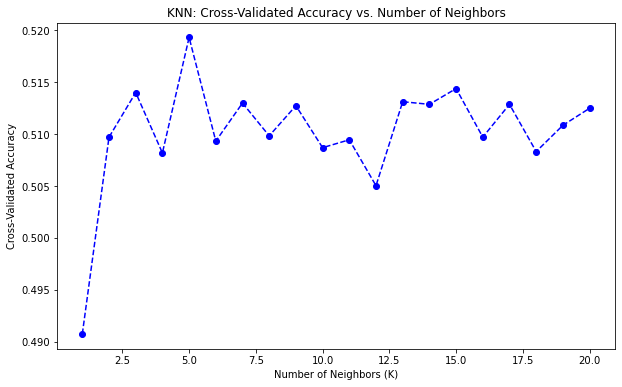

The best number of neighbors: 5


In [52]:
neighbors = list(range(1, 21))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')  # 10-fold cross-validation
    cv_scores.append(scores.mean())
    
best_k = neighbors[cv_scores.index(max(cv_scores))]

plt.figure(figsize=(10, 6))
plt.plot(neighbors, cv_scores, marker='o', linestyle='dashed', color='blue')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN: Cross-Validated Accuracy vs. Number of Neighbors')
plt.show()

print(f"The best number of neighbors: {best_k}")

### THE KNN MODEL

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Splitting the

knn = KNeighborsClassifier(n_neighbors=5) 

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.66


But this has the accuracy of only 0.66

In [54]:
req_ncr_df.shape

(7922, 16)

### We will use IQR to detect and then eliminate the outliers

In [55]:
Q1 = req_ncr_df['Votes'].quantile(0.25)
Q3 = req_ncr_df['Votes'].quantile(0.75)
IQR = Q3 - Q1

In [56]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [57]:
outliers = req_ncr_df[(req_ncr_df['Votes'] < lower_bound) | (req_ncr_df['Votes'] > upper_bound)]

In [58]:
cleaned_df = req_ncr_df[(req_ncr_df['Votes'] >= lower_bound) & (req_ncr_df['Votes'] <= upper_bound)]

In [59]:
cleaned_df.shape

(6966, 16)

In [60]:
A = cleaned_df.drop(columns=['Rating text'])  # Features
b = cleaned_df['Rating text']  # Target variable

In [61]:
information_gain = mutual_info_classif(A, b)

feature_scores = pd.DataFrame({'Feature': A.columns, 'Information Gain': information_gain})
feature_scores = feature_scores.sort_values(by='Information Gain', ascending=False)
print(feature_scores)

                 Feature  Information Gain
13          Rating color          1.191972
12      Aggregate rating          1.191757
14                 Votes          0.727782
3               Locality          0.218082
0          Restaurant ID          0.217298
5              Longitude          0.115761
6               Latitude          0.108810
4               Cuisines          0.103030
8    Has Online delivery          0.079763
11           Price range          0.063653
7      Has Table booking          0.025091
2                   City          0.010052
1           Country Code          0.007290
9      Is delivering now          0.004105
10  Switch to order menu          0.001002


The above is the feature scores after dealing with outliers

In [62]:
A = cleaned_df[['Has Online delivery','Locality','Cuisines','Longitude','Latitude', 'Price range', 'Votes']] #features
b = cleaned_df['Rating text'] #Target

### To find the best KNN parameter (number of neighbors to be considered) for cleaned_df

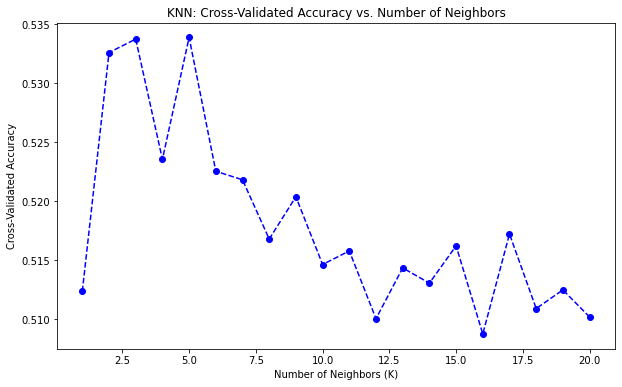

The best number of neighbors: 5


In [63]:
neighbors = list(range(1, 21)) 

cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, A, b, cv=10, scoring='accuracy') 
    cv_scores.append(scores.mean())

best_k = neighbors[cv_scores.index(max(cv_scores))]

plt.figure(figsize=(10, 6))
plt.plot(neighbors, cv_scores, marker='o', linestyle='dashed', color='blue')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN: Cross-Validated Accuracy vs. Number of Neighbors')
plt.show()

print(f"The best number of neighbors: {best_k}")

### THE KNN MODEL (for cleaned_df)

In [64]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

In [65]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(A_train, b_train)

b_pred = knn.predict(A_test)

label_encoder = LabelEncoder()
b_test_encoded = label_encoder.fit_transform(b_test)
b_pred_labels = label_encoder.inverse_transform(b_pred)

accuracy = accuracy_score(b_test_encoded, b_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


After dealing with the outliers the accuracy increased to 0.70 (which is still less)

### The Decision tree model

In [66]:
from sklearn.tree import DecisionTreeClassifier

R = cleaned_df[['Has Online delivery','Locality', 'Cuisines', 'Longitude', 'Latitude', 'Price range', 'Votes']] #features
t = cleaned_df['Rating text'] #target

R_train, R_test, t_train, t_test = train_test_split(R, t, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier() #initializing Decision tree classifier

decision_tree.fit(R_train, t_train) #Training the classifier

t_pred = decision_tree.predict(R_test) #Prediction on R_test

accuracy = accuracy_score(t_test, t_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.77


### The Random forest model (Using cross-validation to find the appropriate number of trees)

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
M = cleaned_df[['Has Online delivery','Locality', 'Cuisines', 'Longitude', 'Latitude', 'Price range', 'Votes']] #features
n = cleaned_df['Rating text'] #target

M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.3, random_state=42)

num_trees = [10, 50, 100, 200, 300] 

mean_scores = []

for trees in num_trees:
    rf = RandomForestClassifier(n_estimators=trees, random_state=42)
    scores = cross_val_score(rf, M_train, n_train, cv=5, scoring='accuracy')  
    mean_scores.append(np.mean(scores))

optimal_num_trees = num_trees[np.argmax(mean_scores)]
print("Optimal number of trees:", optimal_num_trees)

Optimal number of trees: 100


In [71]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

Q = cleaned_df[['Has Online delivery','Locality', 'Cuisines', 'Longitude', 'Latitude', 'Price range', 'Votes']]
r = cleaned_df['Rating text']

Q_train, Q_test, r_train, r_test = train_test_split(Q, r, test_size=0.2, random_state=42) # Splitting the data in train and test

random_forest = RandomForestClassifier(n_estimators=100) # Initializing the RandomForest classifier

random_forest.fit(Q_train, r_train) #Training the classifier

r_pred = random_forest.predict(Q_test) #Prediction on Q_test

accuracy = accuracy_score(r_test, r_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84
